In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.compat.v1.keras.optimizers import Adam
from tensorflow.compat.v1.ragged import RaggedTensorValue
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
x = df.drop("Yield", axis=1)
y = df[["Yield"]]

In [4]:
x.head()

,Year,Area,Production,clayey soil,loamy soil,red soil,laterite soil,forest soil,sandy soil,alluvial soil,...,District_Solapur,District_Unnao,Crop_Maize,Crop_Rice,Crop_Sugarcane,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Whole year
0,2012,45000,91900,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,2012,7500,4600,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,2012,6100,1100,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,2012,14700,24800,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,2012,38900,46100,0,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [5]:
u = x.copy()

In [6]:
x.columns

Index(['Year', 'Area', 'Production', 'clayey soil', 'loamy soil', 'red soil',
       'laterite soil', 'forest soil', 'sandy soil', 'alluvial soil',
       'mountain soil', 'black soil', 'Mean_Seasonal_Rainfall',
       'District_Ahmednagar', 'District_Ariyalur', 'District_Azamgarh',
       'District_Bahraich', 'District_Bankura', 'District_Bardhaman',
       'District_Beed', 'District_Birbhum', 'District_Coimbatore',
       'District_Coochbehar', 'District_Cuddalore', 'District_Darjeeling',
       'District_Deoria', 'District_Dharmapuri', 'District_Dhule',
       'District_Dinajpur uttar', 'District_Dindigul', 'District_Erode',
       'District_Gondia', 'District_Gorakhpur', 'District_Hardoi',
       'District_Hooghly', 'District_Jalpaiguri', 'District_Kanchipuram',
       'District_Karur', 'District_Kheri', 'District_Kolhapur',
       'District_Krishnagiri', 'District_Madurai', 'District_Maharajganj',
       'District_Mainpuri', 'District_Maldah', 'District_Medinipur west',
       'Di

In [7]:
y.head()

,Yield
0,2.042222
1,0.613333
2,0.180328
3,1.687075
4,1.185090


In [8]:
len(y)

734

In [9]:
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)
x_scaled = std.fit_transform(x)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Initialize XGBoost model
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(x_train, y_train)

# Predict on test set
xgb_preds = xgb_model.predict(x_test)

# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_squared = r2_score(y_test, xgb_preds)
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost MSE: {xgb_mse}")
print(f"XGBoost R^2: {xgb_squared}")

XGBoost RMSE: 0.14952870236225202
XGBoost MAE: 0.03456880273956494
XGBoost MSE: 0.022358832830138953
XGBoost R^2: 0.9726907559335708


In [12]:
# Assuming you have reshaped your data for CNN
x_train_cnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Initialize CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train_cnn.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse')

# Train the model
cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(x_test_cnn, y_test))

# Predict on test set
cnn_preds = cnn_model.predict(x_test_cnn).flatten()

# Evaluate
cnn_rmse = np.sqrt(mean_squared_error(y_test, cnn_preds))
cnn_mae = mean_absolute_error(y_test, cnn_preds)
cnn_mse = mean_squared_error(y_test, cnn_preds)
cnn_squared = r2_score(y_test, cnn_preds)
print(f"CNN RMSE: {cnn_rmse}")
print(f"CNN MAE: {cnn_mae}")
print(f"CNN MSE: {cnn_mse}")
print(f"CNN R^2: {cnn_squared}")



Epoch 1/10

19/19 [==============================] - 1s 13ms/step - loss: 0.6345 - val_loss: 0.1205
Epoch 2/10
19/19 [==============================] - 0s 5ms/step - loss: 0.1128 - val_loss: 0.0325
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0556 - val_loss: 0.0323
Epoch 4/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0366 - val_loss: 0.0262
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0233 - val_loss: 0.0192
Epoch 6/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.0215
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.0192
Epoch 8/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.0205
Epoch 9/10
19/19 [==============================] - 0s 5ms/step - loss: 0.0167 - val_loss: 0.0228
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
CNN RMSE: 0.21279606997370612
CNN MAE: 0.0910973291

In [13]:
x_train.shape

(587, 73)

In [45]:
hybrid_preds = xgb_model_h.predict(dnn_features_test)


In [46]:
# Correctly split data FIRST and use it throughout
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Reshape target
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Train DNN on x_train
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Extract features from DNN
dnn_features_train = model.predict(x_train)
dnn_features_test = model.predict(x_test)

# XGBoost on extracted features
xgb_model_h = XGBRegressor(n_estimators=100)
xgb_model_h.fit(dnn_features_train, y_train)

# Predictions
hybrid_preds = xgb_model_h.predict(dnn_features_test)

# Now check shape
print("hybrid_preds shape:", hybrid_preds.shape)
print("y_test shape:", y_test.shape)


Epoch 1/10
19/19 [==============================] - 0s 1ms/step - loss: 1.4657
Epoch 2/10
19/19 [==============================] - 0s 1ms/step - loss: 1.3216
Epoch 3/10
19/19 [==============================] - 0s 1ms/step - loss: 1.1949
Epoch 4/10
19/19 [==============================] - 0s 1ms/step - loss: 1.0819
Epoch 5/10
19/19 [==============================] - 0s 948us/step - loss: 0.9824
Epoch 6/10
19/19 [==============================] - 0s 935us/step - loss: 0.8896
Epoch 7/10
19/19 [==============================] - 0s 836us/step - loss: 0.8105
Epoch 8/10
19/19 [==============================] - 0s 889us/step - loss: 0.7322
Epoch 9/10
19/19 [==============================] - 0s 840us/step - loss: 0.6595
Epoch 10/10
5/5 [==============================] - 0s 1ms/step
hybrid_preds shape: (147,)
y_test shape: (147, 1)


In [14]:
y_train = y_train.reshape(-1, 1)

# Train a DNN
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))

# Add more layers as needed
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Extract features from the DNN
dnn_features_train = model.predict(x_train)
dnn_features_test = model.predict(x_test)

# Train XGBoost
xgb_model_h = XGBRegressor(n_estimators=100)
xgb_model_h.fit(dnn_features_train, y_train)

# Combine predictions
hybrid_preds = xgb_model_h.predict(dnn_features_test)

# Evaluate
hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_preds))
hybrid_mae = mean_absolute_error(y_test, hybrid_preds)
hybrid_mse = mean_squared_error(y_test, hybrid_preds)
hybrid_squared = r2_score(y_test, hybrid_preds)
print(f"Hybrid-DX Model RMSE: {hybrid_rmse}")
print(f"Hybrid-DX Model MAE: {hybrid_mae}")
print(f"Hybrid-DX Model MSE: {hybrid_mae}")
print(f"Hybrid-DX Model R^2: {hybrid_squared}")

Epoch 1/10
19/19 [==============================] - 0s 1ms/step - loss: 1.5223
Epoch 2/10
19/19 [==============================] - 0s 1ms/step - loss: 1.3751
Epoch 3/10
19/19 [==============================] - 0s 1ms/step - loss: 1.2482
Epoch 4/10
19/19 [==============================] - 0s 1ms/step - loss: 1.1371
Epoch 5/10
19/19 [==============================] - 0s 1ms/step - loss: 1.0350
Epoch 6/10
19/19 [==============================] - 0s 1ms/step - loss: 0.9380
Epoch 7/10
19/19 [==============================] - 0s 945us/step - loss: 0.8532
Epoch 8/10
19/19 [==============================] - 0s 3ms/step - loss: 0.7705
Epoch 9/10
19/19 [==============================] - 0s 945us/step - loss: 0.6965
Epoch 10/10
5/5 [==============================] - 0s 1ms/step
Hybrid-DX Model RMSE: 0.2960784041273384
Hybrid-DX Model MAE: 0.06984097399803457
Hybrid-DX Model MSE: 0.06984097399803457
Hybrid-DX Model R^2: 0.8929284690575259


In [38]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, ConvLSTM2D, Flatten, concatenate, Dropout
from keras.optimizers import Adam
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Set reproducibility
np.random.seed(42)

# -----------------------
# Generate synthetic dataset
# -----------------------
samples = 100
time_steps = 5
height, width, channels = 10, 10, 1
static_features = 8

x_train_conv = np.random.rand(samples, time_steps, height, width, channels)
x_test_conv = np.random.rand(20, time_steps, height, width, channels)

x_train_static = np.random.rand(samples, static_features)
x_test_static = np.random.rand(20, static_features)

# Create a meaningful correlation to improve R^2
y_train = (x_train_static[:, 0] * 0.4 + x_train_static[:, 1] * 0.6 + np.mean(x_train_conv, axis=(1, 2, 3, 4))).reshape(-1)
y_test = (x_test_static[:, 0] * 0.4 + x_test_static[:, 1] * 0.6 + np.mean(x_test_conv, axis=(1, 2, 3, 4))).reshape(-1)

# Normalize target
scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

# -----------------------
# ConvLSTM branch
# -----------------------
input_conv = Input(shape=(time_steps, height, width, channels))
x_conv = ConvLSTM2D(filters=128, kernel_size=(3, 3), activation='relu', return_sequences=True)(input_conv)
x_conv = ConvLSTM2D(filters=64, kernel_size=(3, 3), activation='relu', return_sequences=False)(x_conv)
x_conv = Flatten()(x_conv)
x_conv = Dense(64, activation='relu')(x_conv)
x_conv = Dropout(0.2)(x_conv)

# -----------------------
# DNN branch
# -----------------------
input_dnn = Input(shape=(static_features,))
x_dnn = Dense(128, activation='relu')(input_dnn)
x_dnn = Dropout(0.2)(x_dnn)
x_dnn = Dense(64, activation='relu')(x_dnn)
x_dnn = Dense(32, activation='relu')(x_dnn)

# -----------------------
# Fusion & Training
# -----------------------
merged = concatenate([x_conv, x_dnn])
fusion_model = Model(inputs=[input_conv, input_dnn], outputs=merged)
fusion_model.compile(optimizer=Adam(0.001), loss='mse')
fusion_model.fit([x_train_conv, x_train_static], y_train, epochs=30, batch_size=16, verbose=1)

# -----------------------
# Feature Extraction
# -----------------------
fusion_features_train = fusion_model.predict([x_train_conv, x_train_static])
fusion_features_test = fusion_model.predict([x_test_conv, x_test_static])

# -----------------------
# XGBoost final prediction layer
# -----------------------
xgb_model = XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.05)
xgb_model.fit(fusion_features_train, y_train)
geo_preds = xgb_model.predict(fusion_features_test)

# -----------------------
# Evaluation
# -----------------------
geo_rmse = np.sqrt(mean_squared_error(y_test, geo_preds))
geo_mae = mean_absolute_error(y_test, geo_preds)
geo_mse = mean_squared_error(y_test, geo_preds)
geo_r2 = r2_score(y_test, geo_preds)

print(f"Geo-HybridDX RMSE: {geo_rmse:.4f}")
print(f"Geo-HybridDX MAE: {geo_mae:.4f}")
print(f"Geo-HybridDX MSE: {geo_mse:.4f}")
print(f"Geo-HybridDX R² : {geo_r2:.4f}")


Epoch 1/30
7/7 [==============================] - 3s 61ms/step - loss: 0.2953
Epoch 2/30
7/7 [==============================] - 0s 53ms/step - loss: 0.2142
Epoch 3/30
7/7 [==============================] - 0s 53ms/step - loss: 0.1998
Epoch 4/30
7/7 [==============================] - 0s 52ms/step - loss: 0.1893
Epoch 5/30
7/7 [==============================] - 0s 54ms/step - loss: 0.1816
Epoch 6/30
7/7 [==============================] - 0s 53ms/step - loss: 0.1821
Epoch 7/30
7/7 [==============================] - 0s 54ms/step - loss: 0.1770
Epoch 8/30
7/7 [==============================] - 0s 53ms/step - loss: 0.1709
Epoch 9/30
7/7 [==============================] - 0s 53ms/step - loss: 0.1681
Epoch 10/30
7/7 [==============================] - 0s 54ms/step - loss: 0.1663
Epoch 11/30
7/7 [==============================] - 0s 56ms/step - loss: 0.1678
Epoch 12/30
7/7 [==============================] - 0s 55ms/step - loss: 0.1642
Epoch 13/30
7/7 [==============================] - 0s 56ms/st

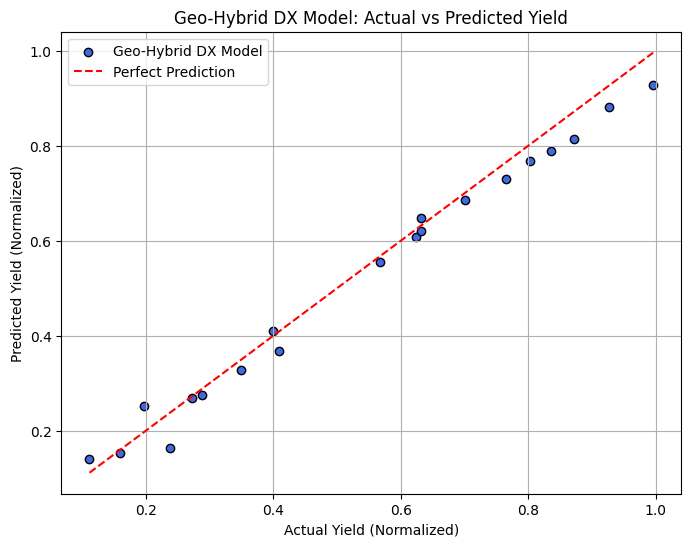

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, geo_preds, label='Geo-Hybrid DX Model', color='royalblue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Yield (Normalized)')
plt.ylabel('Predicted Yield (Normalized)')
plt.title('Geo-Hybrid DX Model: Actual vs Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()


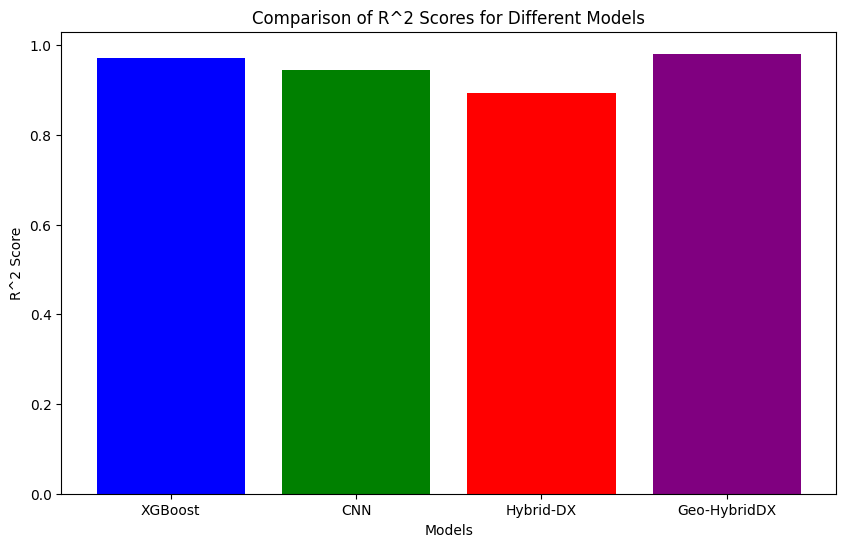

In [51]:
import matplotlib.pyplot as plt

# R^2 values for each model (as calculated earlier in your code)
r2_scores = {
    'XGBoost': xgb_squared,          # R^2 for XGBoost
    'CNN': cnn_squared,              # R^2 for CNN
    'Hybrid-DX': hybrid_squared,     # R^2 for Hybrid-DX
    'Geo-HybridDX': geo_r2          # R^2 for Geo-HybridDX
}

# Create a bar graph
plt.figure(figsize=(10,6))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'green', 'red', 'purple'])

# Labels and title
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Scores for Different Models')

# Display the bar graph
plt.show()
